In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [2]:
random_state("rng_states/experiment7.npy")

In [3]:
S = [0.6] * 40
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 4

rectangle_lists = [
    [((i - 0.85, 3), (i + 0.85, 6)) for i in range(-6, 7, 2)],
    [((i - 1.85, 3), (i - 0.15, 6)) for i in range(-6, 7, 2)],
] * 2
targets = np.array([0., 8.]) + np.random.uniform(-0.5, 0.5, size=(T, 2))
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 500
alpha_inf = 0.8
n_immigrants = 150
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = 0.03
num_iterations_init = 300
num_iterations = 160

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 263, best: [23.46924554], #infeasible: 237, best: [0.62012177 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 100, best: [14.43209873], #infeasible: 400, best: [0.00496731 1.        ]
Iteration 40, #feasible: 100, best: [14.43209873], #infeasible: 400, best: [0.00305754 1.        ]
Iteration 60, #feasible: 100, best: [14.43209873], #infeasible: 400, best: [0.00210172 1.        ]
Iteration 80, #feasible: 100, best: [14.43209873], #infeasible: 400, best: [6.49648923e-05 1.00000000e+00]
Iteration 100, #feasible: 100, best: [14.43209873], #infeasible: 400, best: [1.14302651e-05 1.00000000e+00]
Iteration 120, #feasible: 100, best: [0.21560308], #infeasible: 400, best: [1.14302651e-05 1.00000000e+00]
Iteration 140, #feasible: 100, best: [0.15453266], #infeasible: 400, best: [6.95290897e-06 1.00000000e+00]
Iteration 160, #feasible: 100, best: [0.01165173], #infeasible: 400, best: [6.95290897e-06 1.00000000e+00]
Iteration 180, #feasible: 100, best: [0.00057798], #infeasible: 400, best: [7.61010659e-07 1.00000000e+00]
Iteration 200, #feasible: 100, best: [1.22444134e-05], #infe

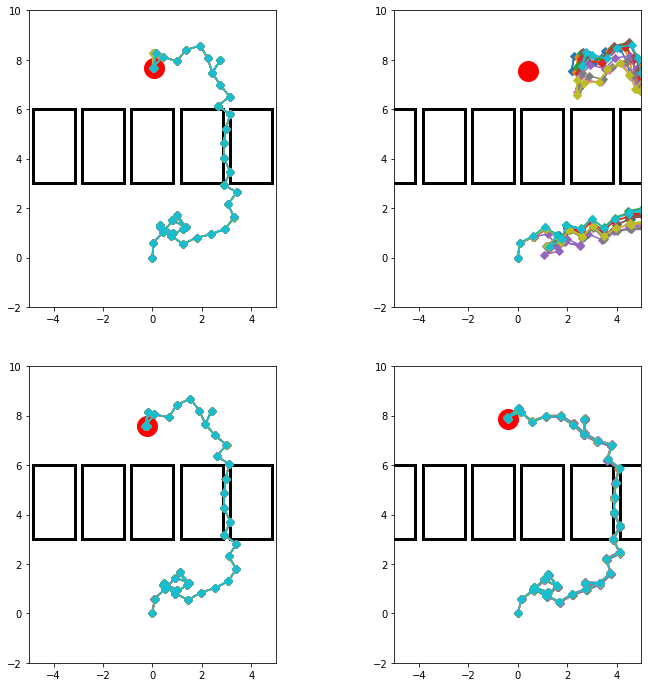

In [4]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))

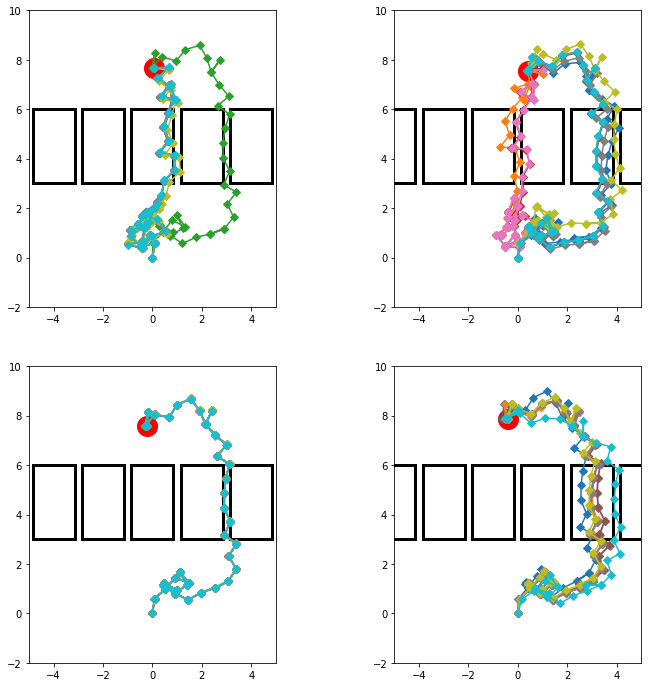

In [5]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))


In [12]:
random_state("rng_states/experiment7.npy")

In [13]:
S = [0.6] * 40
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 4

rectangle_lists = [
    [((i - 0.85, 3), (i + 0.85, 6)) for i in range(-8, 9, 2)],
    [((i - 1.85, 3), (i - 0.15, 6)) for i in range(-8, 9, 2)],
] * 2
targets = np.array([0., 8.]) + np.random.uniform(-0.5, 0.5, size=(T, 2))
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 500
alpha_inf = 0.8
n_immigrants = 150
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = np.geomspace(0.01, 0.05, d)
num_iterations_init = 300
num_iterations = 160

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 257, best: [23.5873481], #infeasible: 243, best: [0.62012177 1.        ]
Iteration 20, #feasible: 100, best: [17.96589654], #infeasible: 400, best: [5.59637203e-04 1.00000000e+00]
Iteration 40, #feasible: 100, best: [17.96589654], #infeasible: 400, best: [5.59637203e-04 1.00000000e+00]
Iteration 60, #feasible: 100, best: [17.96589654], #infeasible: 400, best: [1.13773083e-04 1.00000000e+00]
Iteration 80, #feasible: 100, best: [17.96589654], #infeasible: 400, best: [3.61155058e-05 1.00000000e+00]
Iteration 100, #feasible: 100, best: [17.96589654], #infeasible: 400, best: [2.95025623e-06 1.00000000e+00]
Iteration 120, #feasible: 100, best: [12.17656919], #infeasible: 400, best: [2.43600413e-06 1.00000000e+00]
Iteration 140, #feasible: 100, best: [12.17656919], #infeasible: 400, best: [1.51027148e-06 1.00000000e+00]
Iteration 160, #feasible: 100, best: [12.17656919], #infeasible: 400, best: [9.89505194e-07 1.00000000e+00]
Iteration 180, #feasible: 100, best: [1

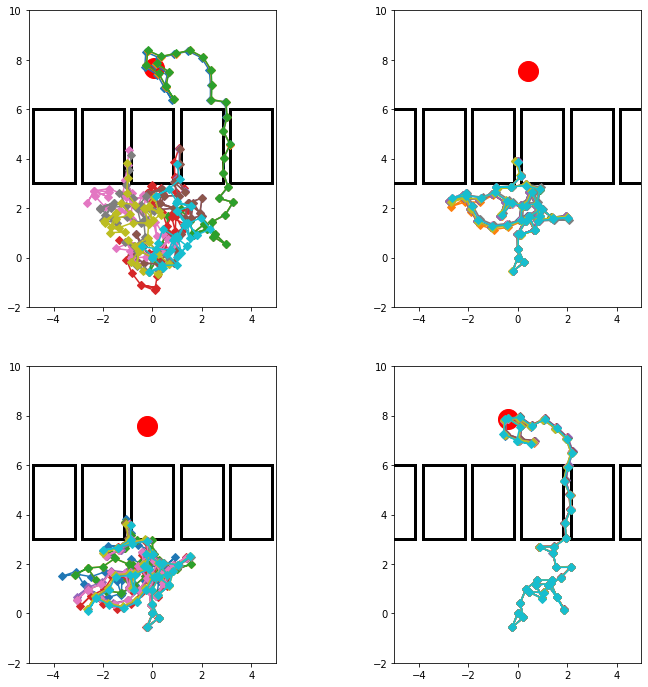

In [14]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))

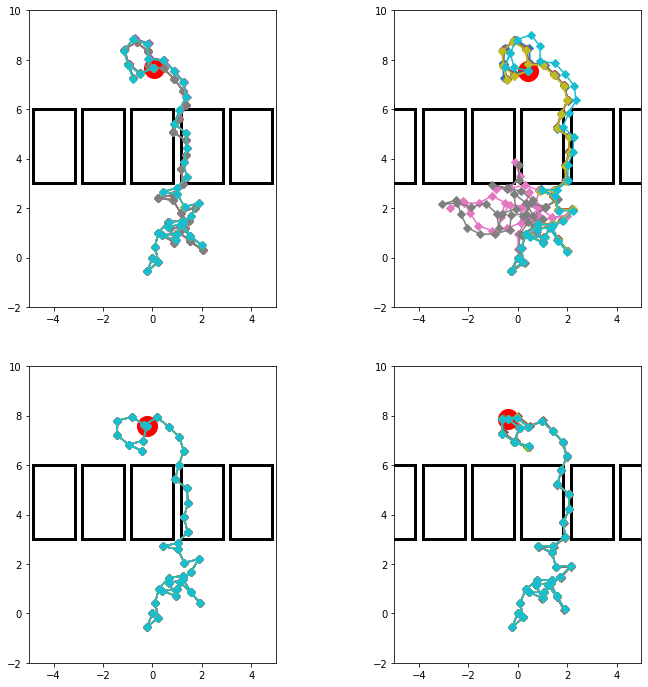

In [15]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))
